In [285]:
# Importing all the important packages

import numpy as np
from scipy.integrate import quad
from astropy.io import ascii
from astropy.constants import c as lightspeed
from astropy.cosmology import LambdaCDM
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.style.use(['science', 'std-colors', 'grid'])
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['text.usetex'] = False 
plt.rcParams['font.family'] = 'Times New Roman'

c = lightspeed.value / 1000  # c in km/s

# Explicitly specify the names of the columns
column_names = ['redshift', 'distance_modulus', 'error']
data_table = ascii.read('SCP_sn1a_data.csv', format='csv', names=column_names)

# Extracting the columns from the csv file
redshift = data_table['redshift']
distance_modulus = data_table['distance_modulus']
error = data_table['error']

# Models for a Flat Universe
# Universe with Matter + Lambda
def matter_lambda_model(z, omega_m, h):
    H0 = 100 * h
    def integrand(z, omega_m):
        omega_lambda = 1 - omega_m
        return 1 / np.sqrt((omega_m) * (1 + z) ** 3 + (omega_lambda))

    integral = np.array([quad(integrand, 0, i, args=(omega_m))[0] for i in z])
    radial_distance = (c / H0) * integral
    luminosity_distance = radial_distance * (1 + z)
    distance_modulus = 5 * np.log10(luminosity_distance) + 25
    return distance_modulus

# Models for a Universe with Curvature
def curvature_model(z, omega_m, omega_de, h):
    H0 = 100 * h
    cosmo = LambdaCDM(H0=H0, Om0=omega_m, Ode0=omega_de)
    return cosmo.distmod(z).value

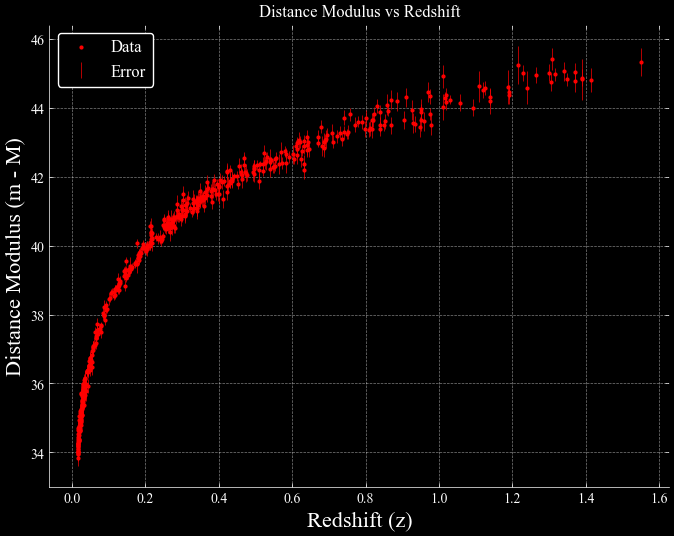

In [286]:
# Plot of Distance Modulus vs Redshift on normal scale
plt.figure(figsize=(8, 6), facecolor='black')  # Set figure size to (8, 6) inches and background color to black

plt.scatter(redshift, distance_modulus, s=4, color='red', label='Data')  # Scatter plot of the data points

# Additional plot customization
plt.grid(color='white')  # Add white grid lines
plt.errorbar(redshift, distance_modulus, yerr=error, fmt='none', elinewidth=0.5, ecolor='red', ls='none', label='Error')  
plt.title('Distance Modulus vs Redshift', color='white')  # Set title with white text
plt.xlabel('Redshift (z)', color='white')  # Set x-axis label with white text
plt.ylabel('Distance Modulus (m - M)', color='white')  # Set y-axis label with white text
plt.legend(loc='upper left', fontsize='large', facecolor='black', edgecolor='white', labelcolor='white')  # Set legend properties
plt.tick_params(axis='both', colors='white')  # Set tick color to white
plt.gca().spines['bottom'].set_color('white')  # Set x-axis line color to white
plt.gca().spines['left'].set_color('white')  # Set y-axis line color to white
plt.gca().set_facecolor('black')  # Set plot area color to black

plt.show()

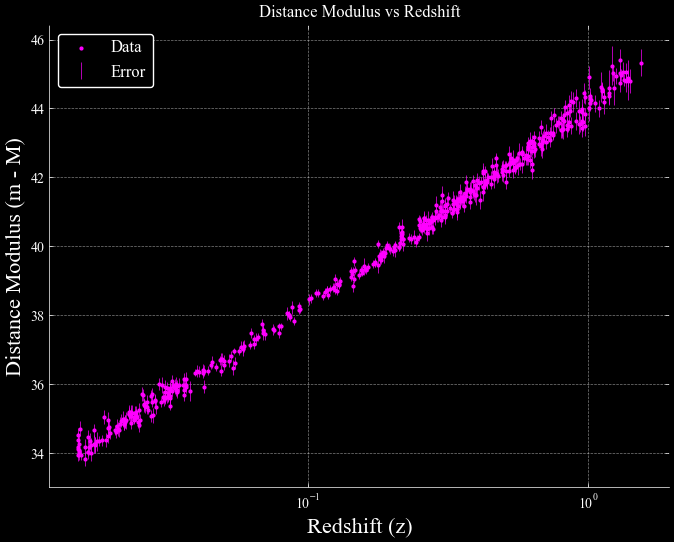

In [287]:
# Plot of Distance Modulus vs Redshift on log scale
plt.figure(figsize=(8, 6), facecolor='black')  # Set figure size to (8, 6) inches and background color to black

plt.scatter(redshift, distance_modulus, s=4, color='magenta', label='Data')  # Scatter plot of the data points
plt.errorbar(redshift, distance_modulus, yerr=error, fmt='none', elinewidth=0.5, ecolor='magenta', ls='none', label='Error')  # Error bars in red

# Additional plot customization
plt.grid(color='white')  # Add white grid lines
plt.xscale('log')
plt.title('Distance Modulus vs Redshift', color='white')  # Set title with white text
plt.xlabel('Redshift (z)', color='white')  # Set x-axis label with white text
plt.ylabel('Distance Modulus (m - M)', color='white')  # Set y-axis label with white text
plt.legend(loc='upper left', fontsize='large', facecolor='black', edgecolor='white', labelcolor='white')  # Set legend properties
plt.tick_params(axis='both', colors='white')  # Set tick color to white
plt.gca().spines['bottom'].set_color('white')  # Set x-axis line color to white
plt.gca().spines['left'].set_color('white')  # Set y-axis line color to white
plt.gca().set_facecolor('black')  # Set plot area color to black

plt.show()

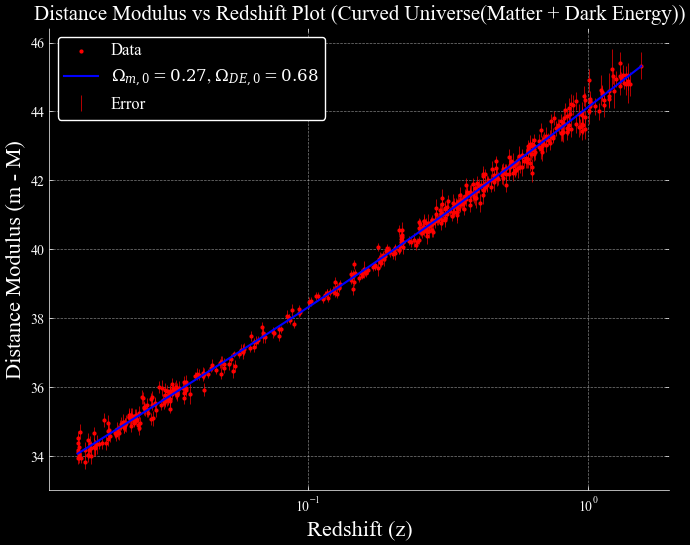

0.2680917274384209 0.6792405983466343 0.6990744565461128


In [288]:
# Plot for Curved Universe

opt_params_curved, cov_matrix_curved = curve_fit(curvature_model, redshift, distance_modulus, sigma=error)

plt.figure(figsize=(8, 6), facecolor='black')  # Set figure size to (8, 6) inches and background color to black

plt.scatter(redshift, distance_modulus, s=4, color='red', label='Data')  # Data points in red
plt.errorbar(redshift, distance_modulus, yerr=error, fmt='none', elinewidth=0.5, ecolor='red', ls='none', label='Error')  

plt.plot(redshift, curvature_model(redshift, opt_params_curved[0], opt_params_curved[1], opt_params_curved[2]), lw=1.5, ls='-', color='blue', label=r'$\Omega_{m,0}=0.27$, $\Omega_{DE,0}=0.68$')  

plt.gca().set_facecolor('black')  # Set plot area color to black

plt.grid(color='white')

plt.title('Distance Modulus vs Redshift Plot (Curved Universe(Matter + Dark Energy))', color='white', fontsize='15')

plt.xscale('log')
plt.xlabel('Redshift (z)', color='white')
plt.ylabel('Distance Modulus (m - M)', color='white')
plt.legend(loc='upper left', fontsize='large', facecolor='black', edgecolor='white', labelcolor='white')  # Set legend properties
plt.tick_params(axis='both', colors='white')  # Set tick color

# Set x and y axis line color to white
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')

plt.show()

print(opt_params_curved[0], opt_params_curved[1], opt_params_curved[2])

In [289]:
# Errors

errors = np.sqrt(np.diag(cov_matrix_curved))
error_omega_m = errors[0]  # Error for omega_m
error_omega_de = errors[1]  # Error for omega_de
error_h = errors[2]  # Error for h

print("Error for omega_m:", error_omega_m)
print("Error for omega_de:", error_omega_de)
print("Error for h:", error_h)

Error for omega_m: 0.06910941509509927
Error for omega_de: 0.11657921312666643
Error for h: 0.004311950003239554


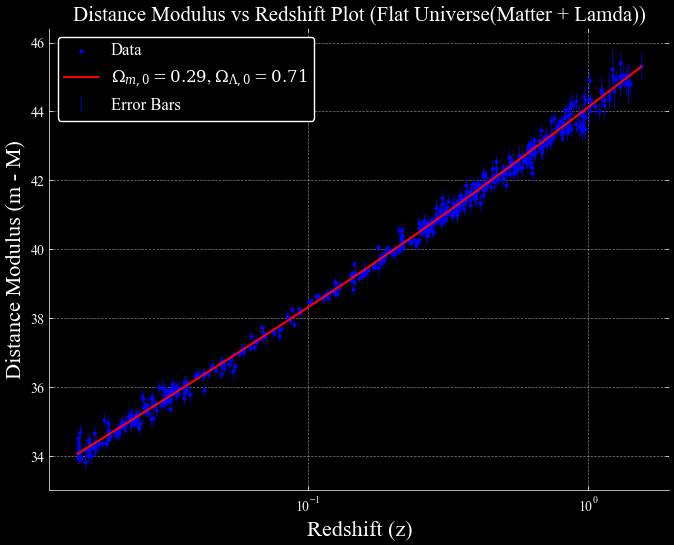

0.2873856473988023 0.6998638364435734


In [290]:
# Plot for Flat Universe

opt_params_flat, cov_matrix_flat = curve_fit(matter_lambda_model, redshift, distance_modulus, sigma=error)

plt.figure(figsize=(8, 6), facecolor='black')  # Set figure size to (8, 6) inches and background color to black

plt.scatter(redshift, distance_modulus, s=4, color='blue', label='Data')
plt.errorbar(redshift, distance_modulus, yerr=error, fmt='none', elinewidth=0.5, ecolor='blue', ls='none', label='Error Bars')
plt.plot(redshift, matter_lambda_model(redshift, opt_params_flat[0], opt_params_flat[1]), lw=1.5, ls='-', color='red', label=r'$\Omega_{m,0}=0.29$, $\Omega_{\Lambda,0}=0.71$')

plt.gca().set_facecolor('black')  # Set plot area color to black

plt.grid(color='white')

plt.title('Distance Modulus vs Redshift Plot (Flat Universe(Matter + Lamda))', color='white', fontsize='15')

plt.xscale('log')
plt.xlabel('Redshift (z)', color='white')
plt.ylabel('Distance Modulus (m - M)', color='white')
plt.legend(loc='upper left', fontsize='large', facecolor='black', edgecolor='white', labelcolor='white')  # Set legend properties
plt.tick_params(axis='both', colors='white')  # Set tick color

# Set x and y axis line color to white
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')

plt.show()

print(opt_params_flat[0], opt_params_flat[1])

In [291]:
# Errors

errors = np.sqrt(np.diag(cov_matrix_flat))
error_omega_m = errors[0]  
error_h = errors[1]  

print("Error for omega_m:", error_omega_m)
print("Error for h:", error_h)

Error for omega_m: 0.019521310936716385
Error for h: 0.0033462984718988166
